In [ ]:
import numpy as np
import random
from matplotlib import pyplot as plt
from scipy.interpolate import lagrange
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

## Fire Simulator ##

---
Fire damage can be very dangerous, 

so this model uses monte carlo and interprelation to simulate fire.

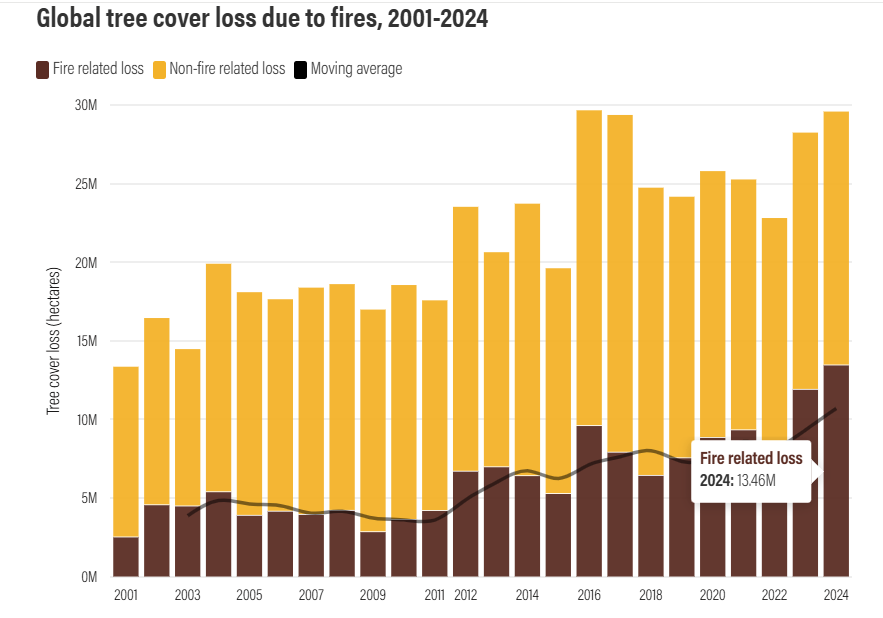

https://www.wri.org/insights/global-trends-forest-fires

fire vewy bad and getting worse, 
seal sadge

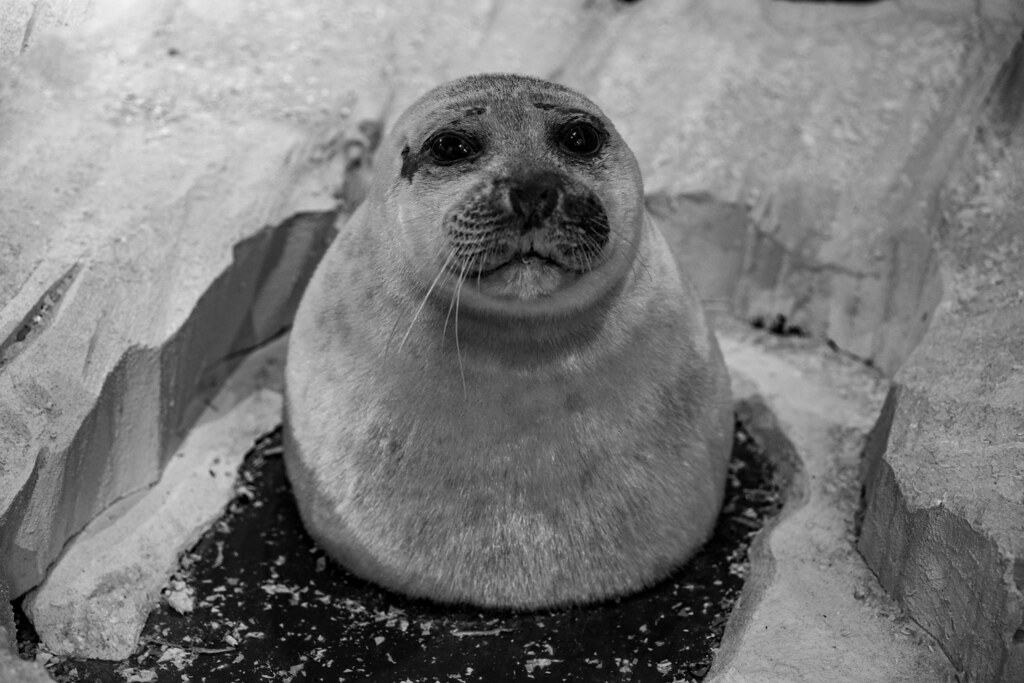

---
## Implementaions
The equation used is: $$\frac{dt}{dB} ​=  rPMC​(t)B(t)(1−B(t)) − dB(t)$$ 



where we use an existing model and add other factors: $$\frac{dt}{dB} =  rB(1-B) - dB$$

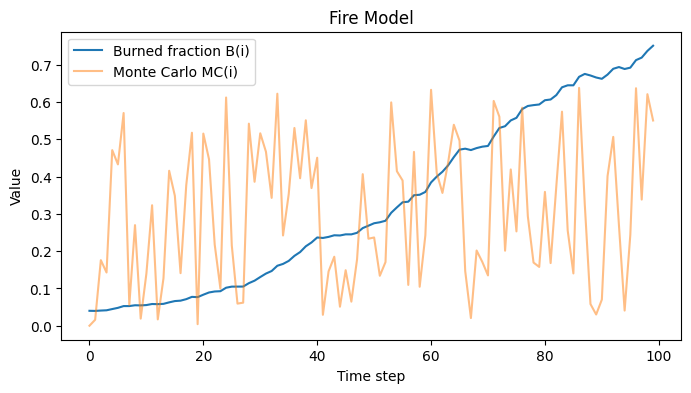

In [ ]:
#Parameters 
steps = 100 # Determines how long the fire model runs.
r = 0.20 # Growth rate.
B0 = 0.04 # Initial burned fraction of the forest
d = 0.01 # Decay rate.
dt = 1.0 # The time-step size for Euler's method.
w_random = random.random() # controls the range of randomness for the whole run.


B = np.zeros(steps) # Stores the burned fraction at each step.
B[0] = B0 
MC_ser = np.zeros(steps) # Stores the random Monte-Carlo factor at each step.

for i in range(1, steps):
    MC = random.uniform(0, w_random) # Represents environmental randomness: like windspeed humity and other factors
    MC_ser[i] = MC # Saves the MC value for plotting.


# Euler step: dB/dt = r*P_MC*B*(1-B) - d*B
    dBdt = r * MC * B[i-1] * (1 - B[i-1]) - d * B[i-1]
    B[i] = B[i-1] + dt * dBdt # Updates B using forward Euler integration


# Clamp B between 0 and 1 for safety purposes
    if B[i] < 0: B[i] = 0 
    if B[i] > 1: B[i] = 1   


# Plot results
plt.figure(figsize=(8,4))
plt.plot(B, label='Burned fraction B(i)') 
plt.plot(MC_ser, label='Monte Carlo MC(i)', alpha=0.5)
plt.xlabel('Time step')
plt.ylabel('Value')
plt.legend()
plt.title('Fire Model')
plt.show()

In [ ]:
B_target = 0.5 #root finding method (threshold crossing)
for t in range(len(B)-1):
    if B[t] < B_target <= B[t+1]:
        t_threshold_approx = t
        break
print("Approximate time:", t_threshold_approx)


Approximate time: 70
